In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest_android = pd.read_csv("../../data_files/data_from_android_api/rest/rest_25_mins.csv")

forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_5.csv")

back1 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_1.csv')
back2 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_2.csv')


forward = pd.concat([forward_android5, forward_android4])
back = pd.concat([back1, back2])

dataDF = pd.concat([forward, back])

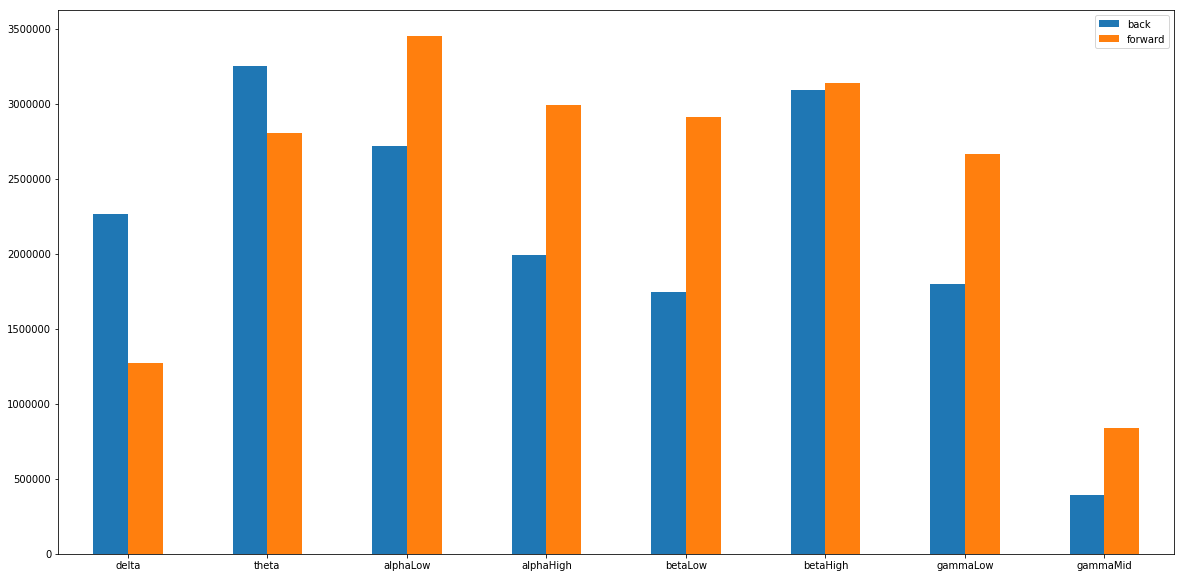

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 

u = [back.delta.mean(), back.theta.mean(), back.alphaLow.mean(), 
     back.betaHigh.mean(), back.betaLow.mean(), back.alphaHigh.mean(), 
     back.gammaLow.mean(), back.gammaMid.mean()]

d = [forward.delta.mean(), forward.theta.mean(), forward.alphaLow.mean(), 
     forward.betaHigh.mean(), forward.betaLow.mean(), forward.alphaHigh.mean(), 
     forward.gammaLow.mean(), forward.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'back': u, 'forward': d}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [3]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

all_data = dataDF.drop(['action'], axis=1)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


scores = cross_val_score(rfc, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

[0.19387911 0.13444212 0.10819613 0.09117022 0.10716855 0.10922581
 0.11133712 0.14458094]
The score for Random Forest  0.5606557377049181
913
Accuracy for x_test: 0.5606557377049181
Cross Validation Accuracy: 0.58 (+/- 0.21)
[0.45901639 0.50819672 0.42622951 0.48360656 0.52459016 0.59836066
 0.66393443 0.71311475 0.71900826 0.67768595]


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selec

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


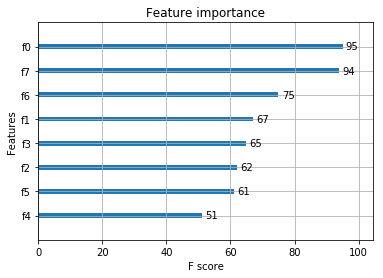

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The score for XGBoost  0.6360655737704918
Accuracy for x_test: 0.6360655737704918
Accuracy: 63.61%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.64 (+/- 0.29)
[0.43442623 0.51639344 0.5        0.58196721 0.55737705 0.55737705
 0.79508197 0.85245902 0.82644628 0.75206612]


In [5]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# plot feature importance
plot_importance(xgb)
pyplot.show()
print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

In [6]:
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc","error"]

# Model Tuning and feature importance XGBoost

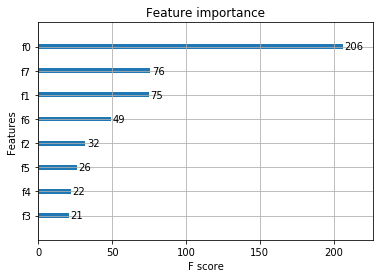

The score for XGBoost  0.6426229508196721
Accuracy for x_test: 0.6426229508196721
Accuracy: 64.26%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.64 (+/- 0.30)
[0.42622951 0.54098361 0.51639344 0.53278689 0.57377049 0.57377049
 0.80327869 0.8442623  0.85123967 0.76033058]


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.041, n=8, Accuracy: 64.26%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.043, n=7, Accuracy: 63.28%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.051, n=6, Accuracy: 63.61%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.063, n=5, Accuracy: 63.61%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.097, n=4, Accuracy: 62.95%
Thresh=0.148, n=3, Accuracy: 64.92%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was pass

Thresh=0.150, n=2, Accuracy: 64.92%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.406, n=1, Accuracy: 64.26%


In [7]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

xgb = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
xgb.fit(x_train, y_train)
# plot feature importance
plot_importance(xgb)
pyplot.show()
# print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 5,425
Trainable params: 5,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

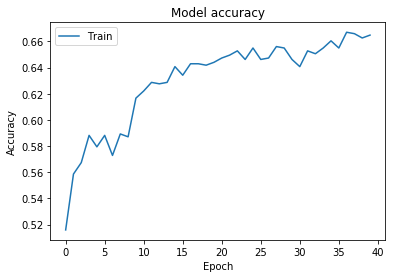

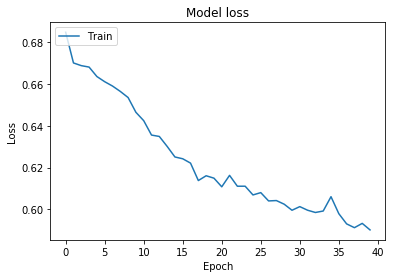

In [8]:
from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(16, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(16, activation="sigmoid"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=40, verbose=1, batch_size=3)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [9]:
all_labels = dataDF.action.values

encoder = LabelBinarizer()
all_labels = encoder.fit_transform(all_labels)
    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

all_data = scaler.fit_transform(all_data)




/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:

from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=10, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, labels)):
    print("Training on fold " + str(index + 1) + "/10.............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = labels[train_index], labels[test_index]

    network = models.Sequential()
    

    network.add(layers.Dense(32, input_shape=(8,)))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(32, activation="sigmoid"))
    network.add(layers.Dense(1, activation='sigmoid'))

    # Adam = Adam(lr=0.05)
    network.compile(optimizer=Adam(lr=0.0004),
                    loss='binary_crossentropy',
                    metrics=['acc'])

    network.summary()

    history = network.fit(x_train, y_train, validation_split=0.2,
                          epochs=40, verbose=1, batch_size=3)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

Training on fold 1/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_______

876/876 [==============================] - 1s 781us/step - loss: 0.6619 - acc: 0.6244 - val_loss: 0.9756 - val_acc: 0.0000e+00
Epoch 3/40
876/876 [==============================] - 1s 707us/step - loss: 0.6613 - acc: 0.6244 - val_loss: 0.9792 - val_acc: 0.0000e+00
Epoch 4/40
876/876 [==============================] - 1s 602us/step - loss: 0.6601 - acc: 0.6244 - val_loss: 0.9495 - val_acc: 0.0000e+00
Epoch 5/40
876/876 [==============================] - 1s 589us/step - loss: 0.6597 - acc: 0.6244 - val_loss: 0.9473 - val_acc: 0.0000e+00
Epoch 6/40
876/876 [==============================] - 1s 577us/step - loss: 0.6584 - acc: 0.6244 - val_loss: 0.9477 - val_acc: 0.0000e+00
Epoch 7/40
876/876 [==============================] - 1s 573us/step - loss: 0.6576 - acc: 0.6244 - val_loss: 0.9623 - val_acc: 0.0000e+00
Epoch 8/40
876/876 [==============================] - 1s 572us/step - loss: 0.6572 - acc: 0.6244 - val_loss: 0.8942 - val_acc: 0.0000e+00
Epoch 9/40
876/876 [=========================

876/876 [==============================] - 1s 649us/step - loss: 0.6486 - acc: 0.6279 - val_loss: 0.8871 - val_acc: 0.0227
Epoch 13/40
876/876 [==============================] - 1s 615us/step - loss: 0.6474 - acc: 0.6336 - val_loss: 0.9418 - val_acc: 0.0227
Epoch 14/40
876/876 [==============================] - 1s 638us/step - loss: 0.6466 - acc: 0.6336 - val_loss: 0.8885 - val_acc: 0.0227
Epoch 15/40
876/876 [==============================] - 1s 596us/step - loss: 0.6462 - acc: 0.6370 - val_loss: 0.9332 - val_acc: 0.0227
Epoch 16/40
876/876 [==============================] - 1s 588us/step - loss: 0.6455 - acc: 0.6381 - val_loss: 0.9228 - val_acc: 0.0227
Epoch 17/40
876/876 [==============================] - 1s 677us/step - loss: 0.6449 - acc: 0.6370 - val_loss: 0.8795 - val_acc: 0.0227
Epoch 18/40
876/876 [==============================] - 1s 646us/step - loss: 0.6433 - acc: 0.6381 - val_loss: 0.9527 - val_acc: 0.0227
Epoch 19/40
876/876 [==============================] - 1s 717us/ste

876/876 [==============================] - 1s 637us/step - loss: 0.6467 - acc: 0.6438 - val_loss: 0.9420 - val_acc: 0.0409
Epoch 23/40
876/876 [==============================] - 1s 638us/step - loss: 0.6451 - acc: 0.6461 - val_loss: 0.9229 - val_acc: 0.0455
Epoch 24/40
876/876 [==============================] - 1s 706us/step - loss: 0.6450 - acc: 0.6404 - val_loss: 0.8891 - val_acc: 0.0636
Epoch 25/40
876/876 [==============================] - 1s 671us/step - loss: 0.6438 - acc: 0.6416 - val_loss: 0.8235 - val_acc: 0.2000
Epoch 26/40
876/876 [==============================] - 1s 621us/step - loss: 0.6425 - acc: 0.6427 - val_loss: 0.9178 - val_acc: 0.0636
Epoch 27/40
876/876 [==============================] - 1s 729us/step - loss: 0.6438 - acc: 0.6473 - val_loss: 0.8638 - val_acc: 0.0636
Epoch 28/40
876/876 [==============================] - 1s 692us/step - loss: 0.6432 - acc: 0.6313 - val_loss: 0.8920 - val_acc: 0.0636
Epoch 29/40
876/876 [==============================] - 1s 673us/ste

876/876 [==============================] - 1s 587us/step - loss: 0.6322 - acc: 0.6473 - val_loss: 0.8901 - val_acc: 0.0864
Epoch 33/40
876/876 [==============================] - 1s 596us/step - loss: 0.6316 - acc: 0.6484 - val_loss: 0.8916 - val_acc: 0.0864
Epoch 34/40
876/876 [==============================] - 0s 568us/step - loss: 0.6311 - acc: 0.6427 - val_loss: 0.9159 - val_acc: 0.0864
Epoch 35/40
876/876 [==============================] - 1s 583us/step - loss: 0.6296 - acc: 0.6484 - val_loss: 0.9177 - val_acc: 0.0818
Epoch 36/40
876/876 [==============================] - 1s 585us/step - loss: 0.6295 - acc: 0.6461 - val_loss: 0.9116 - val_acc: 0.0864
Epoch 37/40
876/876 [==============================] - 1s 586us/step - loss: 0.6287 - acc: 0.6507 - val_loss: 0.9119 - val_acc: 0.0864
Epoch 38/40
876/876 [==============================] - 1s 574us/step - loss: 0.6293 - acc: 0.6473 - val_loss: 0.9138 - val_acc: 0.0864
Epoch 39/40
876/876 [==============================] - 1s 653us/ste

Train on 876 samples, validate on 220 samples
Epoch 1/40
876/876 [==============================] - 2s 2ms/step - loss: 0.6676 - acc: 0.6244 - val_loss: 0.9640 - val_acc: 0.0000e+00
Epoch 2/40
876/876 [==============================] - 1s 669us/step - loss: 0.6630 - acc: 0.6244 - val_loss: 0.9652 - val_acc: 0.0000e+00
Epoch 3/40
876/876 [==============================] - 1s 651us/step - loss: 0.6627 - acc: 0.6244 - val_loss: 0.9613 - val_acc: 0.0000e+00
Epoch 4/40
876/876 [==============================] - 1s 655us/step - loss: 0.6629 - acc: 0.6244 - val_loss: 0.9916 - val_acc: 0.0000e+00
Epoch 5/40
876/876 [==============================] - 1s 629us/step - loss: 0.6623 - acc: 0.6244 - val_loss: 0.9932 - val_acc: 0.0000e+00
Epoch 6/40
876/876 [==============================] - 1s 770us/step - loss: 0.6623 - acc: 0.6244 - val_loss: 1.0193 - val_acc: 0.0000e+00
Epoch 7/40
876/876 [==============================] - 1s 693us/step - loss: 0.6617 - acc: 0.6244 - val_loss: 0.9624 - val_acc: 0

876/876 [==============================] - 1s 649us/step - loss: 0.6578 - acc: 0.6244 - val_loss: 1.0130 - val_acc: 0.0000e+00
Epoch 11/40
876/876 [==============================] - 1s 685us/step - loss: 0.6571 - acc: 0.6244 - val_loss: 0.9812 - val_acc: 0.0000e+00
Epoch 12/40
876/876 [==============================] - 1s 600us/step - loss: 0.6555 - acc: 0.6244 - val_loss: 0.9321 - val_acc: 0.0000e+00
Epoch 13/40
876/876 [==============================] - 1s 624us/step - loss: 0.6552 - acc: 0.6279 - val_loss: 1.0161 - val_acc: 0.0000e+00
Epoch 14/40
876/876 [==============================] - 1s 713us/step - loss: 0.6537 - acc: 0.6267 - val_loss: 0.9985 - val_acc: 0.0000e+00
Epoch 15/40
876/876 [==============================] - 1s 734us/step - loss: 0.6524 - acc: 0.6256 - val_loss: 0.9773 - val_acc: 0.0000e+00
Epoch 16/40
876/876 [==============================] - 1s 661us/step - loss: 0.6506 - acc: 0.6290 - val_loss: 0.9763 - val_acc: 0.0000e+00
Epoch 17/40
876/876 [==================

Epoch 20/40
877/877 [==============================] - 1s 968us/step - loss: 0.6432 - acc: 0.6442 - val_loss: 1.0130 - val_acc: 0.0318
Epoch 21/40
877/877 [==============================] - 1s 1ms/step - loss: 0.6426 - acc: 0.6420 - val_loss: 0.9815 - val_acc: 0.0318
Epoch 22/40
877/877 [==============================] - 1s 953us/step - loss: 0.6409 - acc: 0.6454 - val_loss: 0.9840 - val_acc: 0.0318
Epoch 23/40
877/877 [==============================] - 1s 935us/step - loss: 0.6413 - acc: 0.6454 - val_loss: 1.0400 - val_acc: 0.0318
Epoch 24/40
877/877 [==============================] - 1s 895us/step - loss: 0.6400 - acc: 0.6477 - val_loss: 1.0322 - val_acc: 0.0318
Epoch 25/40
877/877 [==============================] - 1s 987us/step - loss: 0.6381 - acc: 0.6420 - val_loss: 1.0818 - val_acc: 0.0273
Epoch 26/40
877/877 [==============================] - 1s 1ms/step - loss: 0.6398 - acc: 0.6454 - val_loss: 1.0292 - val_acc: 0.0318
Epoch 27/40
877/877 [==============================] - 1s 8

877/877 [==============================] - 1s 945us/step - loss: 0.6409 - acc: 0.6431 - val_loss: 1.0583 - val_acc: 0.0455
Epoch 31/40
877/877 [==============================] - 1s 1ms/step - loss: 0.6383 - acc: 0.6499 - val_loss: 1.0050 - val_acc: 0.0455
Epoch 32/40
877/877 [==============================] - 1s 1ms/step - loss: 0.6394 - acc: 0.6385 - val_loss: 1.0852 - val_acc: 0.0409
Epoch 33/40
877/877 [==============================] - 1s 1ms/step - loss: 0.6388 - acc: 0.6420 - val_loss: 0.9952 - val_acc: 0.0455
Epoch 34/40
877/877 [==============================] - 1s 1ms/step - loss: 0.6372 - acc: 0.6465 - val_loss: 1.0627 - val_acc: 0.0409
Epoch 35/40
877/877 [==============================] - 1s 1ms/step - loss: 0.6384 - acc: 0.6454 - val_loss: 1.1073 - val_acc: 0.0409
Epoch 36/40
877/877 [==============================] - 1s 978us/step - loss: 0.6368 - acc: 0.6442 - val_loss: 1.0068 - val_acc: 0.0455
Epoch 37/40
877/877 [==============================] - 1s 1ms/step - loss: 0.